In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from IPython.display import display
import re
import seaborn as sns
print(os.getcwd())
print(os.listdir("C:\\Users\\jayar\\OneDrive\\Desktop\\titani"))

C:\Users\jayar\OneDrive\Desktop\titani
['.ipynb_checkpoints', 'gender_submission.csv', 'test.csv', 'Titanic.ipynb', 'train.csv']


In [146]:
# import datasets
(train, test, sample) = [pd.read_csv('C:\\Users\\jayar\\OneDrive\\Desktop\\titani\\train.csv'),pd.read_csv('C:\\Users\\jayar\\OneDrive\\Desktop\\titani\\test.csv'),pd.read_csv('C:\\Users\\jayar\\OneDrive\\Desktop\\titani\\gender_submission.csv')]
train.head()
test.head()
sample.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [147]:
# Train dataset transformation
print(train.columns)
print('--'*50) ## adding a dash line
print(train.describe())
print('--'*46) ## adding a dash line
print(train.isna().any()) # checking whether there are any NaN values
print('--'*46) ## adding a dash line
display(train.head())

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
----------------------------------------------------------------------------------------------------
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057  

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [148]:
# Train set transformation
train["Title"] = train["Name"].map(lambda x: x[x.find(",")+1:x.find(".")]) # most of the Mr and Mrs falls after , and before ., so +1 index takes strings back ,space eg: Mr
test["Title"] = test["Name"].map(lambda x: x[x.find(",")+1:x.find(".")])
print(train["Title"].unique())
print(test["Title"].unique())


[' Mr' ' Mrs' ' Miss' ' Master' ' Don' ' Rev' ' Dr' ' Mme' ' Ms' ' Major'
 ' Lady' ' Sir' ' Mlle' ' Col' ' Capt' ' the Countess' ' Jonkheer']
[' Mr' ' Mrs' ' Miss' ' Master' ' Ms' ' Col' ' Rev' ' Dr' ' Dona']


In [149]:
maleTitles = [' Mr', ' Master' ,' Don' ,' Rev' ,' Dr' ,' Major', ' Sir', ' Col', ' Capt', ' the Countess', ' Jonkheer']
femaleTitles = [' Mrs', ' Miss', ' Mme' ,' Ms' , ' Lady', ' Mlle']

train.loc[train['Title'].isin(maleTitles), 'Title'] = "MALE"
train.loc[train['Title'].isin(femaleTitles), 'Title'] = "FEMALE"
test.loc[test['Title'].isin(maleTitles), 'Title'] = "MALE"
test.loc[test['Title'].isin(femaleTitles), 'Title'] = "FEMALE"
train.loc[: ,'Title'].head()
train['Title'].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [150]:
train.groupby(['Title','Pclass','Survived']).count()

PassengerId  Name  Sex  Age  SibSp  Parch  Ticket  \
Title  Pclass Survived                                                      
FEMALE 1      0                   3     3    3    3      3      3       3   
              1                  89    89   89   80     89     89      89   
       2      0                   6     6    6    6      6      6       6   
              1                  70    70   70   68     70     70      70   
       3      0                  72    72   72   55     72     72      72   
              1                  72    72   72   47     72     72      72   
MALE   1      0                  77    77   77   61     77     77      77   
              1                  47    47   47   42     47     47      47   
       2      0                  91    91   91   84     91     91      91   
              1                  17    17   17   15     17     17      17   
       3      0                 300   300  300  215    300    300     300   
              1                  47    47   47   38     47     47      47   

                        Fare  Cabin  Embarked  
Title  Pclass Survived                         
FEMALE 1      0            3      3         3  
              1           89     76        87  
       2      0            6      1         6  
              1           70      9        70  
       3      0           72      2        72  
              1           72      4        72  
MALE   1      0           77     56        77  
              1           47     41        47  
       2      0           91      2        91  
              1           17      4        17  
       3      0          300      4       300  
              1           47      2        47

D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,MALE
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,FEMALE
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,FEMALE
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,FEMALE
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,MALE


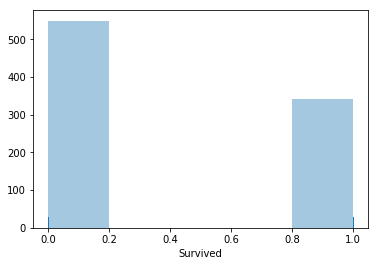

In [151]:
sns.distplot(train['Survived'], kde=False, rug=True)
train.head(5)

In [152]:
from sklearn.metrics import confusion_matrix

#train['Cabin'].isna() == True
c_matrix = confusion_matrix(train['Pclass'], train['Survived'])
df_PClass = pd.DataFrame(c_matrix, columns=['dead','Survived','NA','NA'])
df_PClass
#sns.heatmap(c_matrix, xticklabels=train['Survived'].unique(), yticklabels=train['Pclass'].unique())

,dead,Survived,NA,NA
0,0,0,0,0
1,80,136,0,0
2,97,87,0,0
3,372,119,0,0


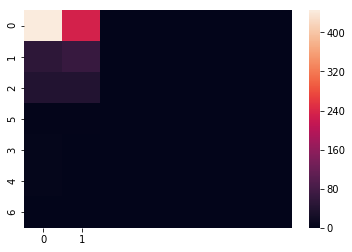

In [153]:
c_mat = confusion_matrix(train['Parch'], train['Survived'])
sns.heatmap(c_mat, xticklabels=train['Survived'].unique(), yticklabels=train['Parch'].unique())

In [154]:
print(train.columns[train.isnull().any()])
print(test.columns[test.isnull().any()])

#updating Age and Fare Nan values with median age of all the passengers
train['Age'].fillna((train['Age'].median()), inplace=True)
test['Age'].fillna((test['Age'].median()), inplace=True)

test['Fare'].fillna((test['Fare'].median()), inplace=True)

#updating Embarked in train with C class
train['Embarked'].fillna('C', inplace=True)

#converting Male and Female categories to dummy Male-1, Female-2 for mathematical calculations

train['Title'] = train['Title'].map(lambda x: 1 if x == 'MALE' else 2)

print(train['Sex'].unique())
train.head()

Index(['Age', 'Cabin', 'Embarked'], dtype='object')
Index(['Age', 'Fare', 'Cabin'], dtype='object')
['male' 'female']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [155]:
# size of each family

train['family_size'] = train['SibSp'] + train['Parch']
test['family_size'] = test['SibSp'] + test['Parch']

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0


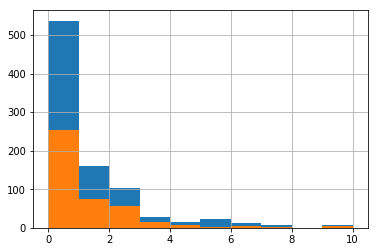

In [156]:
display(train['family_size'].hist())
display(test['family_size'].hist())

In [157]:
print(train['Embarked'].unique())
print(test['Embarked'].unique())

# for Logistic Regression converting S-1, C-2, Q-3 for evaluation
train['Embarked'] = train['Embarked'].apply(lambda x: 1 if x=='S' else 2 if x=='C' else 3)
#test['Embarked'] = test['Embarked'].apply(lambda x: 1 if x=='S' else 2 if x=='C' else 3)

train.head()

['S' 'C' 'Q']
['Q' 'S' 'C']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,1,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,2,2,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,2,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1,2,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,1,1,0


In [158]:
test['Embarked'] = test['Embarked'].apply(lambda x: 1 if x=='S' else 2 if x=='C' else 3)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,family_size
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,3,MALE,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,1,FEMALE,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,3,MALE,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,1,MALE,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,1,FEMALE,2


In [159]:
test['Title'] = test['Title'].map(lambda x: 1 if x=='MALE' else 2)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,family_size
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,3,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,1,2,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,3,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,1,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,1,2,2


In [160]:
# delete features from train and test dataset

drop_features = ['Name','Sex','Ticket','SibSp','Parch','Cabin']
train.drop(train[drop_features], axis=1, inplace=True)

In [161]:
train.head()

,PassengerId,Survived,Pclass,Age,Fare,Embarked,Title,family_size
0,1,0,3,22.0,7.2500,1,1,1
1,2,1,1,38.0,71.2833,2,2,1
2,3,1,3,26.0,7.9250,1,2,0
3,4,1,1,35.0,53.1000,1,2,1
4,5,0,3,35.0,8.0500,1,1,0


In [162]:
test.drop(test[drop_features], axis=1, inplace=True)

In [163]:
test.head()

,PassengerId,Pclass,Age,Fare,Embarked,Title,family_size
0,892,3,34.5,7.8292,3,1,0
1,893,3,47.0,7.0000,1,2,1
2,894,2,62.0,9.6875,3,1,0
3,895,3,27.0,8.6625,1,1,0
4,896,3,22.0,12.2875,1,2,2


In [164]:
# Age categories 0-10 = 1, 10-20=2, 20-50=3, 51 above 4

train['Age_Cate'] = train['Age'].map(lambda x: 1 if x>0 and x<=10
                               else 2 if x>10 and x<=20
                               else 3 if x>20 and x<=50
                               else 4)

In [165]:
test['Age_Cate'] = test['Age'].map(lambda x: 1 if x>0 and x<=10
                               else 2 if x>10 and x<=20
                               else 3 if x>20 and x<=50
                               else 4)

In [166]:
# modeling and prediction
print(train.head())
features = ['Age_Cate', 'Title', 'family_size', 'Fare', 'Embarked']
label = 'Survived'
train

   PassengerId  Survived  Pclass   Age     Fare  Embarked  Title  family_size  \
0            1         0       3  22.0   7.2500         1      1            1   
1            2         1       1  38.0  71.2833         2      2            1   
2            3         1       3  26.0   7.9250         1      2            0   
3            4         1       1  35.0  53.1000         1      2            1   
4            5         0       3  35.0   8.0500         1      1            0   

   Age_Cate  
0         3  
1         3  
2         3  
3         3  
4         3  


,PassengerId,Survived,Pclass,Age,Fare,Embarked,Title,family_size,Age_Cate
0,1,0,3,22.0,7.2500,1,1,1,3
1,2,1,1,38.0,71.2833,2,2,1,3
2,3,1,3,26.0,7.9250,1,2,0,3
3,4,1,1,35.0,53.1000,1,2,1,3
4,5,0,3,35.0,8.0500,1,1,0,3
5,6,0,3,28.0,8.4583,3,1,0,3
6,7,0,1,54.0,51.8625,1,1,0,4
7,8,0,3,2.0,21.0750,1,1,4,1
8,9,1,3,27.0,11.1333,1,2,2,3
9,10,1,2,14.0,30.0708,2,2,1,2


In [167]:
X_train = train[features]
y_train = train[label]

In [168]:
x_test = test[features]

In [169]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [171]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0)
model.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [175]:
# logistic regression prediction

y_pred = model.predict(x_test) #vector of predictions of test Survivied


In [179]:
submission = pd.DataFrame({"PassengerId": test['PassengerId'], "Survived": y_pred})

submission.to_csv("C:\\Users\\jayar\\OneDrive\\Desktop\\titani\\submission.csv", index=False)
